# PROJECT-: CALIFORNIA HOUSE  PRICE PREDICTION MODEL

*# AN ARBITRARY DATASET IS USED IN PREDICTION MODEL*

INTRODUCTION:
The objective of this project is to do analysis on california house price dataset. Algorithm such as Linear Regression along wih various evaluation methods are used to predict the house prices and make comparative analysis.


In [130]:
#importing the depedancies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn import metrics



In [131]:
#importing california house price dataset from csv file into pandas
house_price_dataframe=pd.read_csv("/content/housing.csv.zip")

DATA PREPROCESSING

In [132]:
print(house_price_dataframe)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [133]:
#printing first 5 rows of a dataframe
house_price_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [134]:
#changing the columnn name median_house_value to house price
house_price_dataframe.rename(columns = {'median_house_value':'house_price'}, inplace = True)

In [135]:
house_price_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,house_price,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [136]:
#printing the last 5 rows of dataframe
house_price_dataframe.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,house_price,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


# DATA ANALYSIS

In [137]:
#getting info about dataframe
house_price_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   house_price         20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [138]:
#checking the number of rows and columns in dataframe
house_price_dataframe.shape

(20640, 10)

In [139]:
#checking for missing values
house_price_dataframe.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
house_price             0
ocean_proximity         0
dtype: int64

 number of missing values in column name bedroom = 207

HANDLING MISSING VALUES

<ipython-input-140-cd22c222ea5b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_price_dataframe.total_bedrooms)


<Axes: xlabel='total_bedrooms', ylabel='Density'>

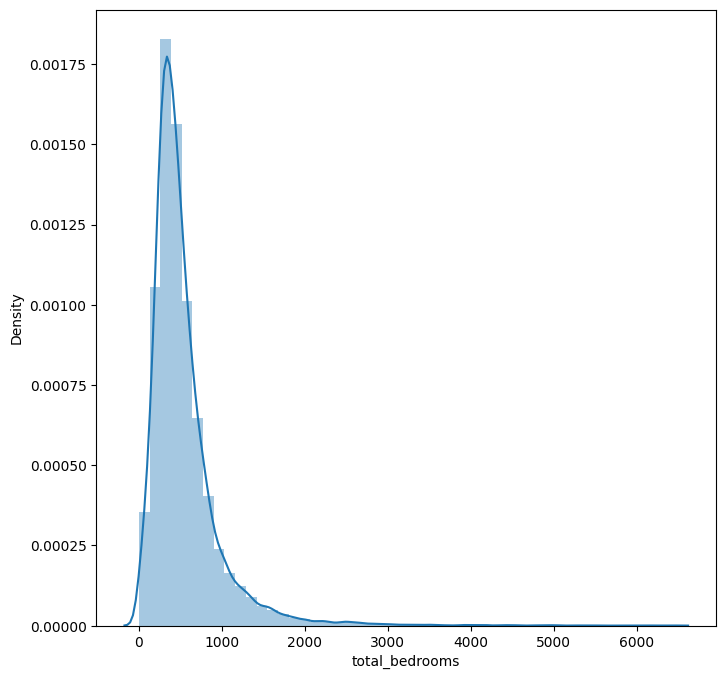

In [140]:
#analysing the distribution of data in total_bedrooms
fig,ax= plt.subplots(figsize=(8,8))
sns.distplot(house_price_dataframe.total_bedrooms)


We can see from the above analysis that the data is right skewed hence missing values can be filled with median values

In [141]:
#fillingthe missing values with meadian values
house_price_dataframe['total_bedrooms'].fillna(house_price_dataframe['total_bedrooms'].median(),inplace=True)

In [142]:
house_price_dataframe.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
house_price           0
ocean_proximity       0
dtype: int64

In [143]:
#statistical measures of dataframe
house_price_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,house_price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


LABEL ENCODING in ocean_proximity(string to integer)

In [144]:
#finding the count of differnt varaiables
house_price_dataframe['ocean_proximity'].value_counts()


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [145]:
#load the label encoder
label_encode=LabelEncoder()

In [146]:
labels=label_encode.fit_transform(house_price_dataframe.ocean_proximity)

In [147]:
#appending the data to the dataframe
house_price_dataframe['ocean_proximity_int']=labels

In [148]:
house_price_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,house_price,ocean_proximity,ocean_proximity_int
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [149]:
house_price_dataframe['ocean_proximity_int'].value_counts()

ocean_proximity_int
0    9136
1    6551
4    2658
3    2290
2       5
Name: count, dtype: int64

hence the data in column named "ocean_proximity" is saved using encoding method as "ocean_proximity_int".now we can drop ocean_proximity column and form a new df

In [150]:
house_price_df=house_price_dataframe.drop("ocean_proximity",axis =1)


In [151]:
house_price_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,house_price,ocean_proximity_int
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'house_price'}>],
       [<Axes: title={'center': 'ocean_proximity_int'}>, <Axes: >,
        <Axes: >]], dtype=object)

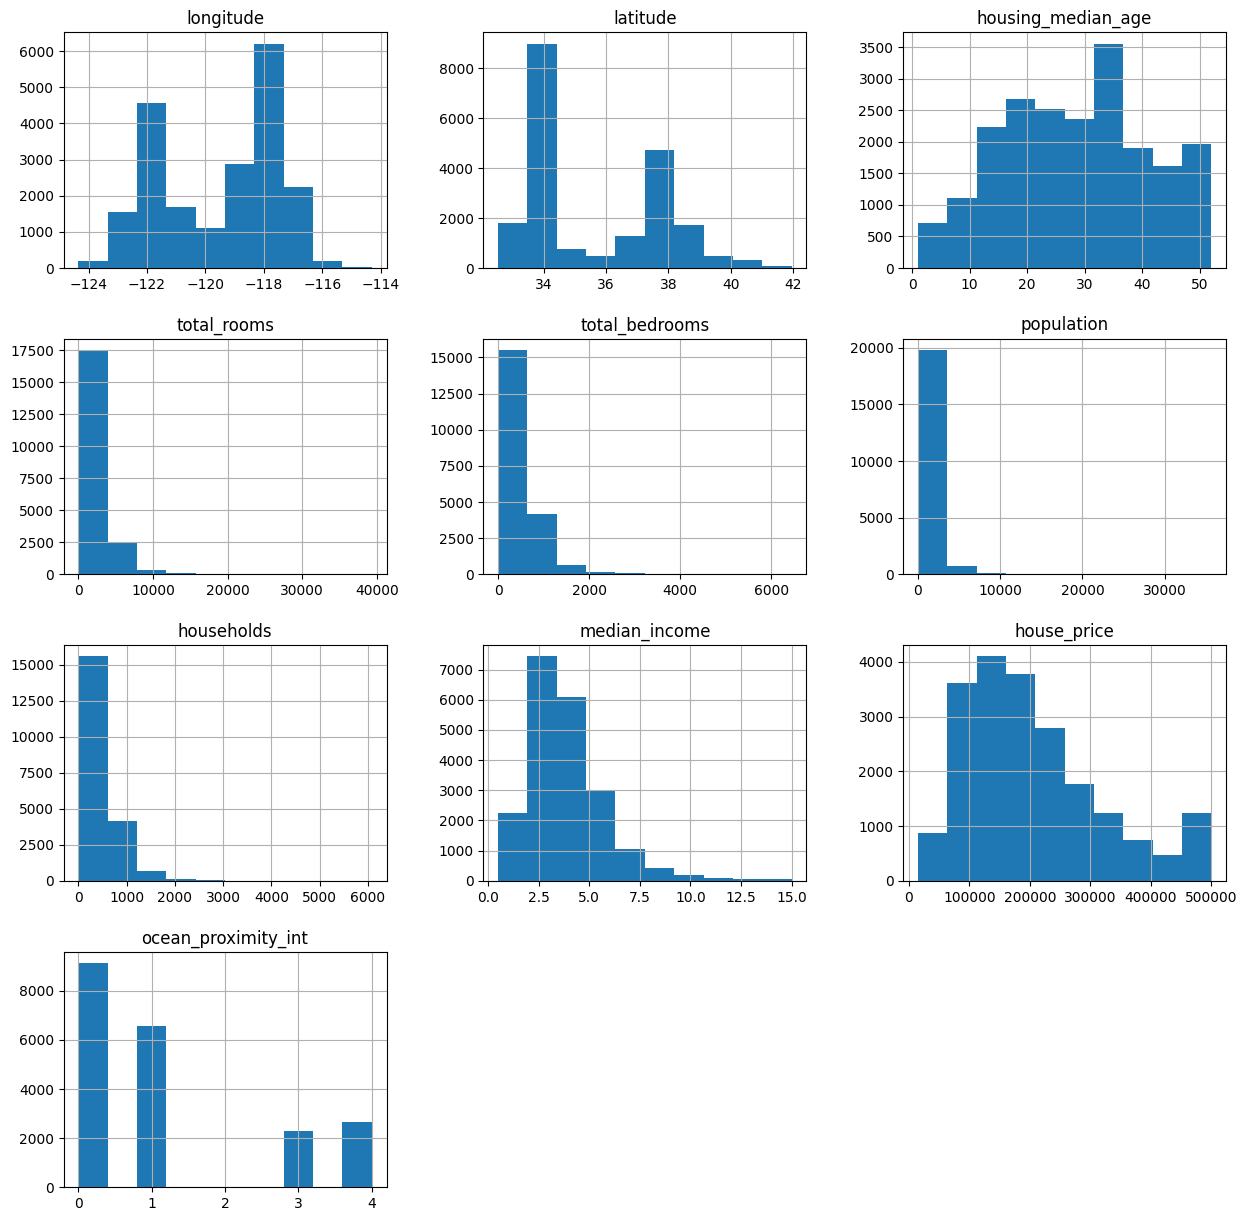

In [152]:
house_price_df.hist(figsize=(15,15))

UNDERSTANDING THE CORREALTION BETWEEN THE FEATURES OF THE DATASET
1. POSTIVE CORREALATION
2. NEGATIVE CORRELATON

<Axes: >

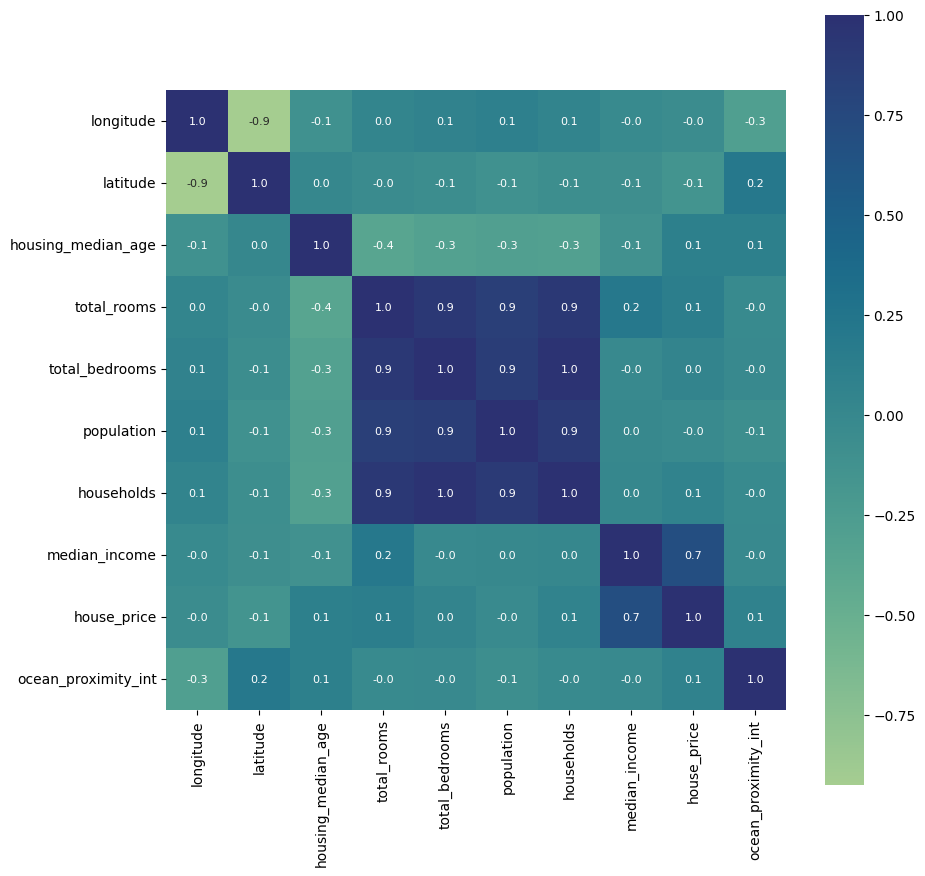

In [153]:
#construcring a heatmap to understand the correlation
correlation= house_price_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='crest')


SPLITTING DATA INTO FEATURES AND TARGET

In [154]:
X=house_price_df.drop(['house_price'],axis=1)
Y=house_price_df['house_price']

In [155]:
print(X)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  ocean

In [156]:
print(Y)

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: house_price, Length: 20640, dtype: float64


SPLITTING THE DATA INTO TRAINING DATA AND TESTING DATA

In [157]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [158]:
print(X.shape,X_train.shape,X_test.shape)

(20640, 9) (16512, 9) (4128, 9)


STANDARDIZE THE DATA

*If value of std is or close to 1 then we can say that our data is in range or standardized.*

In [159]:
#checking whether standard or not
print(house_price_df.std())

longitude                   2.003532
latitude                    2.135952
housing_median_age         12.585558
total_rooms              2181.615252
total_bedrooms            419.391878
population               1132.462122
households                382.329753
median_income               1.899822
house_price            115395.615874
ocean_proximity_int         1.420662
dtype: float64


In [161]:
scaler=StandardScaler()

In [162]:
#standardizing X_train data
scaler.fit(X_train)

StandardScaler()

In [165]:
X_train_standardized=scaler.transform(X_train)

In [166]:
print(X_train_standardized)

[[-0.13763472  0.53456377 -1.79593875 ... -0.21817286 -1.25840302
  -0.11726989]
 [ 0.8798355  -0.90997894 -1.63717833 ... -0.41784146  1.61062276
  -0.82037827]
 [-0.31220069  0.45509054 -0.28771479 ... -0.74457191 -1.22042472
  -0.11726989]
 ...
 [-0.8259234   1.53966629 -0.76399604 ... -0.18705567  0.33367493
  -0.11726989]
 [ 0.71025713 -0.68558395  0.82360812 ...  0.7049703  -0.68091096
  -0.82037827]
 [-2.27731475  2.41854664  0.18856645 ... -0.21039356 -0.85374129
   1.99205525]]


In [168]:
print(X_train_standardized.std())

1.0


In [167]:
#standardizing the X_test data
X_test_standardized=scaler.transform(X_test)

In [169]:
print(X_test_standardized)

[[ 0.95464949 -0.9473781  -1.08151688 ...  0.67644621  1.34551413
  -0.82037827]
 [-0.67130783  1.39941943 -1.3196575  ...  0.56234987  0.16913749
  -0.11726989]
 [ 0.66536874 -0.79310655  0.50608729 ... -0.74457191 -1.12138533
  -0.82037827]
 ...
 [ 0.70028193 -0.77440697  0.10918625 ...  0.56494297 -0.89256473
  -0.82037827]
 [ 1.20901705 -1.36811869  0.26794666 ... -0.44377245 -1.19470089
   1.99205525]
 [ 0.18655922 -0.66220948 -0.04957417 ...  0.9201975   0.18942076
   1.99205525]]


In [170]:
print(X_test_standardized.std())

0.969244663233328


MODEL TRAINING

LINEAR REGRESSION

In [171]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()


fitting the training data in the model


In [172]:
model.fit(X_train_standardized,Y_train)

LinearRegression()

PREDICTION ON TRAINING DATA

In [173]:
#accuracy for prediction on training data
training_data_prediction=model.predict(X_train_standardized)

In [174]:
print(training_data_prediction)

[ 43909.38699568 310635.14420145  78331.44880761 ... 149336.38764829
 170488.40034243 116725.97734767]


Checking closeness of true value(y_train) & predicted value(traing_dataset_prediction)

EVALUATION:

In [175]:
# R squared error
score_1=metrics.r2_score(Y_train,training_data_prediction)
#mean absolute error
score_2=metrics.mean_absolute_error(Y_train,training_data_prediction)
print("r squared error :",score_1)
print("mean absolute error:",score_2)

r squared error : 0.6367398480904238
mean absolute error: 50791.57330730637


Visualisation on actual price vs predicted price[training data]

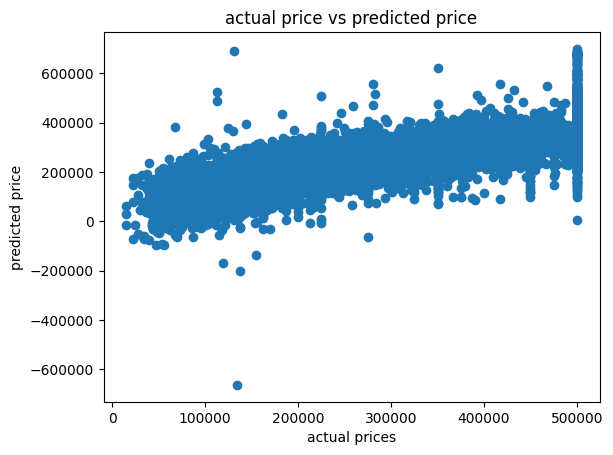

In [176]:
#plotting of graph
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("actual prices")
plt.ylabel("predicted price")
plt.title('actual price vs predicted price')
plt.show()

Actual  price and predicted price are very close to each other.

PREDICTION ON TEST DATA

In [177]:
#accuracy for prediction on test data
test_data_prediction=model.predict(X_test_standardized)

In [178]:
print(test_data_prediction)

[246856.76741345 128744.12099886 131117.71608054 ... 115340.1416211
 125709.33218689 260147.23256809]


In [179]:
# R squared error
score_1=metrics.r2_score(Y_test,test_data_prediction)
#mean absolute error
score_2=metrics.mean_absolute_error(Y_test,test_data_prediction)
print("r squared error :",score_1)
print("mean absolute error:",score_2)

r squared error : 0.6307858117779873
mean absolute error: 51553.43235698627
